<a href="https://colab.research.google.com/github/uditsaini1111/Fraud_Detection/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

In [3]:
with zipfile.ZipFile("/content/Fraud__Data.zip", 'r') as zip_ref:
    zip_ref.extractall("extracted")

In [4]:
df=pd.read_csv('/content/extracted/Fraud.csv', low_memory=False)

In [5]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [42]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [43]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


<Axes: >

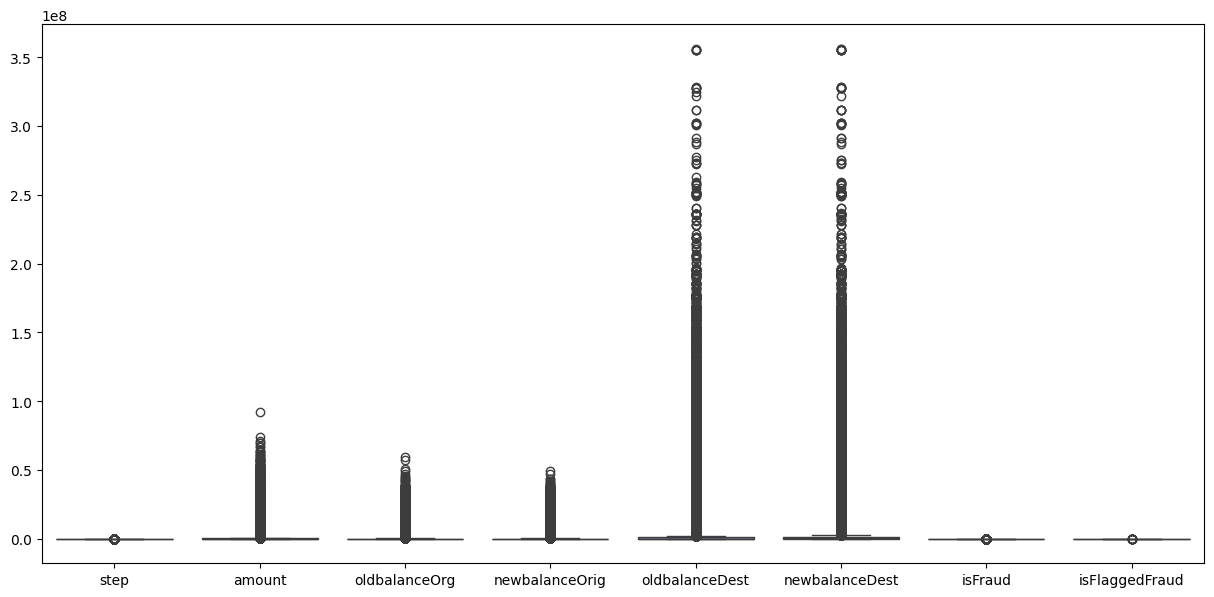

In [14]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df)

In [15]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [16]:
df['nameOrig'].nunique()

6353307

/tmp/ipython-input-3392573232.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[a], ax=axs[i])
/tmp/ipython-input-3392573232.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[a], ax=axs[i])
/tmp/ipython-input-3392573232.py:4: UserWarning: 

`distplot` is a deprecated function and will 

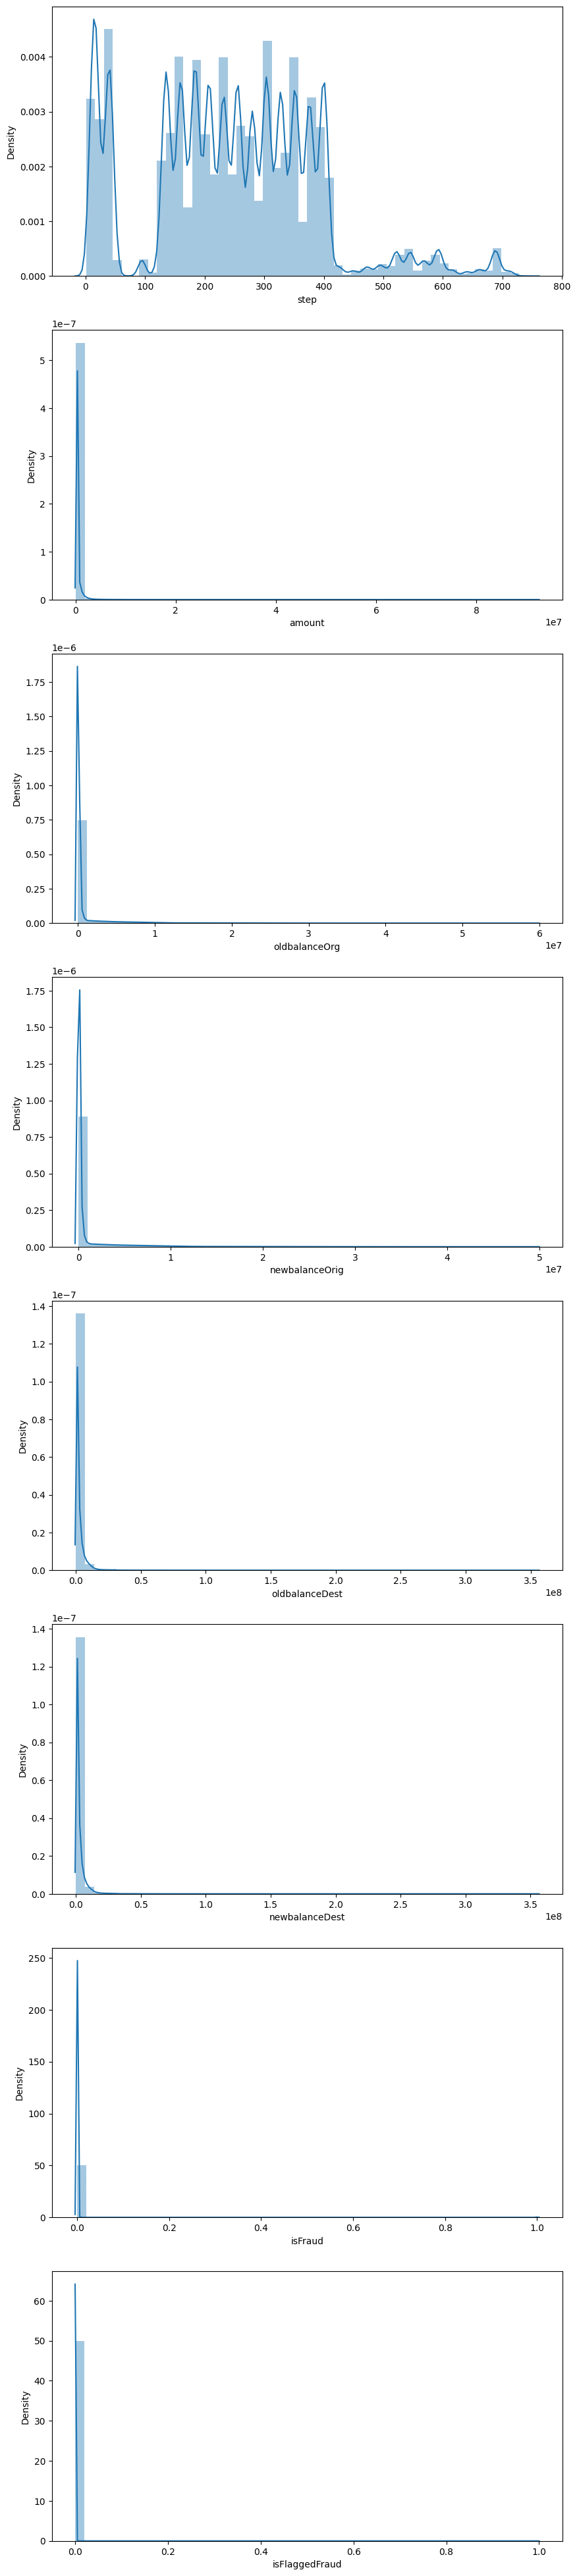

In [ ]:
fig, axs=plt.subplots(8,1,figsize=(10,50))
numeric_column=['step',	'amount',	'oldbalanceOrg',	'newbalanceOrig',	'oldbalanceDest',	'newbalanceDest',	'isFraud',	'isFlaggedFraud']
for i, a in enumerate(numeric_column):
  sns.distplot(df[a], ax=axs[i])

In [6]:
for i in ['amount',	'oldbalanceOrg',	'newbalanceOrig',	'oldbalanceDest',	'newbalanceDest']:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  mask = (df[i] >= lower_bound) & (df[i] <= upper_bound)

In [7]:
df=df[mask]

In [8]:
df.shape

(5624093, 11)

In [9]:
df.reset_index(drop=True, inplace=True)

In [10]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5624088,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.00,C1240760502,503464.5,1762283.33,1,0
5624089,743,TRANSFER,339682.13,C2013999242,339682.13,0.00,C1850423904,0.0,0.00,1,0
5624090,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.0,339682.13,1,0
5624091,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.0,0.00,1,0


<Axes: >

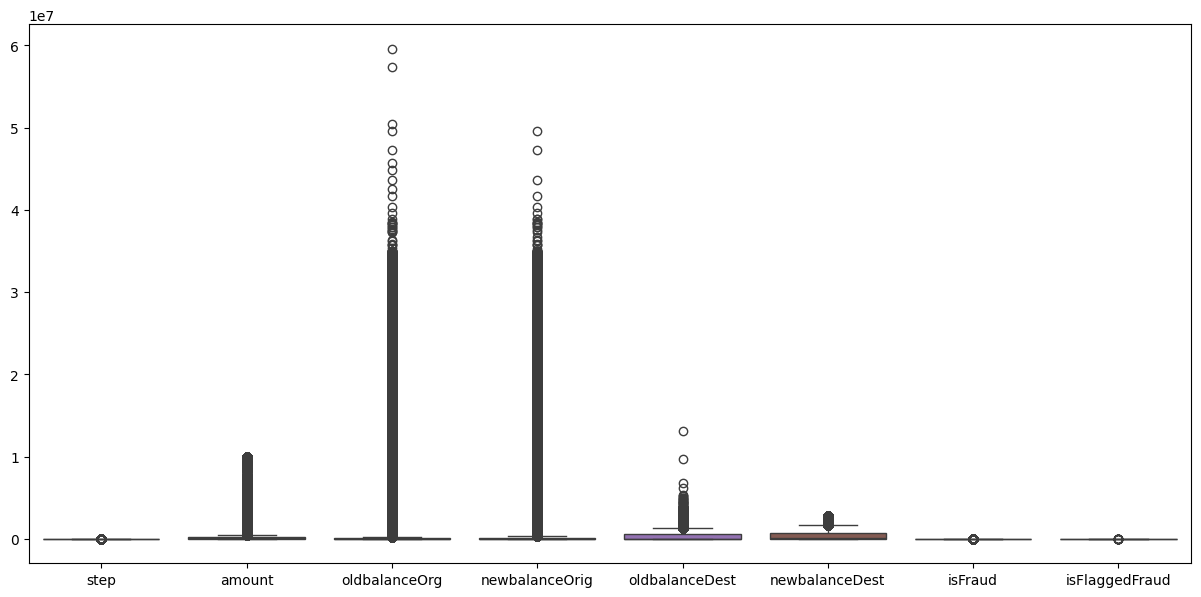

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df)

In [11]:
!pip install dython

/usr/local/lib/python3.12/dist-packages/dython/nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/dython/nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(


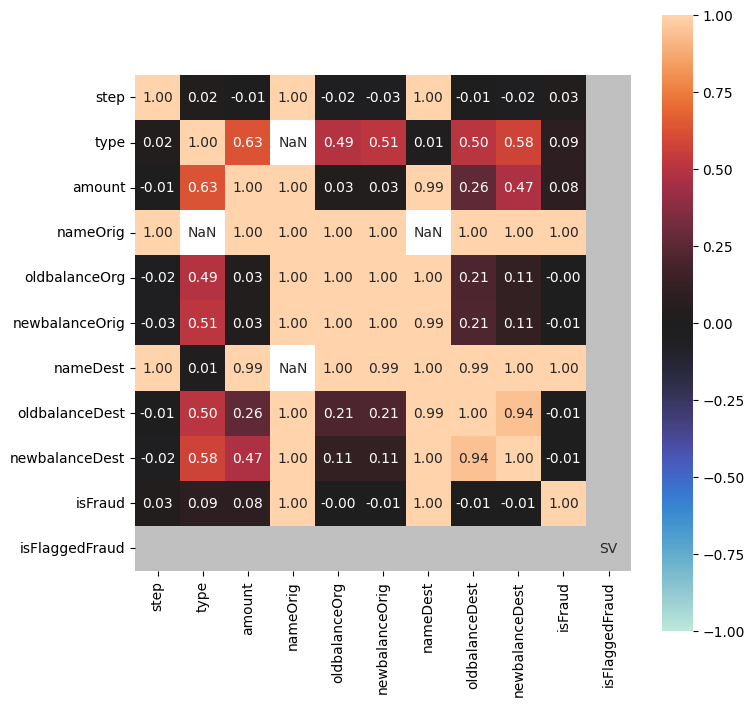

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.024015,-0.010074,1.0,-0.024741,-0.025067,0.997587,-0.012110,-0.018452,0.033242,0.0
type,0.024015,1.000000,0.629804,0.0,0.488785,0.510153,0.007905,0.500114,0.575793,0.085056,0.0
amount,-0.010074,0.629804,1.000000,1.0,0.025954,0.029060,0.993146,0.260422,0.472161,0.081407,0.0
nameOrig,1.000000,0.000000,1.000000,1.0,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.0
oldbalanceOrg,-0.024741,0.488785,0.025954,1.0,1.000000,0.999313,0.995010,0.206135,0.109701,-0.001690,0.0
newbalanceOrig,-0.025067,0.510153,0.029060,1.0,0.999313,1.000000,0.994993,0.211427,0.109440,-0.009130,0.0
nameDest,0.997587,0.007905,0.993146,0.0,0.995010,0.994993,1.000000,0.994570,0.995966,1.000000,0.0
oldbalanceDest,-0.012110,0.500114,0.260422,1.0,0.206135,0.211427,0.994570,1.000000,0.938301,-0.005859,0.0
newbalanceDest,-0.018452,0.575793,0.472161,1.0,0.109701,0.109440,0.995966,0.938301,1.000000,-0.006305,0.0
isFraud,0.033242,0.085056,0.081407,1.0,-0.001690,-0.009130,1.000000,-0.005859,-0.006305,1.000000,0.0


In [12]:
sample_df = df.sample(15000)
from dython.nominal import associations
b=associations(sample_df, figsize=(8,8))
a=b['corr']
a

In [13]:
a = a[(a>0.85) & (a!=1)]
a

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,NaN,NaN,NaN,NaN,NaN,NaN,0.997587,NaN,NaN,NaN,NaN
type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,NaN,NaN,NaN,NaN,NaN,NaN,0.993146,NaN,NaN,NaN,NaN
nameOrig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceOrg,NaN,NaN,NaN,NaN,NaN,0.999313,0.995010,NaN,NaN,NaN,NaN
newbalanceOrig,NaN,NaN,NaN,NaN,0.999313,NaN,0.994993,NaN,NaN,NaN,NaN
nameDest,0.997587,NaN,0.993146,NaN,0.995010,0.994993,NaN,0.994570,0.995966,NaN,NaN
oldbalanceDest,NaN,NaN,NaN,NaN,NaN,NaN,0.994570,NaN,0.938301,NaN,NaN
newbalanceDest,NaN,NaN,NaN,NaN,NaN,NaN,0.995966,0.938301,NaN,NaN,NaN
isFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **we** remove four features from df

because of high correlation
and also categorical features which all are almost distinct , means they dont effect our model **prediction**

In [20]:
df.drop(['nameOrig',	'oldbalanceOrg',	'nameDest', 'newbalanceDest'], axis=1, inplace=True)

/tmp/ipython-input-1964468947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['nameOrig',	'oldbalanceOrg',	'nameDest', 'newbalanceDest'], axis=1, inplace=True)


In [21]:
df

,step,type,amount,newbalanceOrig,oldbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,160296.36,0.0,0,0
1,1,PAYMENT,1864.28,19384.72,0.0,0,0
2,1,TRANSFER,181.00,0.00,0.0,1,0
3,1,CASH_OUT,181.00,0.00,21182.0,1,0
4,1,PAYMENT,11668.14,29885.86,0.0,0,0
...,...,...,...,...,...,...,...
5624088,743,CASH_OUT,1258818.82,0.00,503464.5,1,0
5624089,743,TRANSFER,339682.13,0.00,0.0,1,0
5624090,743,CASH_OUT,339682.13,0.00,0.0,1,0
5624091,743,TRANSFER,6311409.28,0.00,0.0,1,0


In [69]:
x=df.iloc[:,:-2]
y=df.iloc[:,-2:]

y_combined = y["isFraud"] * 2 + y["isFlaggedFraud"]


        fraud  flagged
class 1 = 0   0
class 2 = 0   1
class 3 = 1   0
class 4 = 1   1

In [70]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y_combined)
y_encoded_df = pd.DataFrame(y_encoded, columns=["_target"])

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded_df, test_size=0.33, random_state=42)

In [74]:
y_train.value_counts()

,count
_target,
0,3763436
1,4698
2,8


In [75]:
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [76]:

numeric_p=Pipeline(steps=[("scaler",StandardScaler())])
categorical_p=Pipeline(steps=[("encoder",OneHotEncoder())])

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624093 entries, 0 to 5624092
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   isFraud         int64  
 6   isFlaggedFraud  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 300.4+ MB


In [78]:
preprocessor = ColumnTransformer(transformers=[("num", numeric_p, ['step', 'amount',	'newbalanceOrig',	'oldbalanceDest']),("cat", categorical_p, ['type'])])

In [79]:
X_train_trans = preprocessor.fit_transform(x_train)
X_test_trans = preprocessor.transform(x_test)

feature_names = preprocessor.get_feature_names_out()

In [80]:
train__x = pd.DataFrame(X_train_trans, columns=feature_names)
test__x = pd.DataFrame(X_test_trans, columns=feature_names)

In [81]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(train__x, y_train)

In [82]:
m1= XGBClassifier()
m2=LogisticRegression()

In [84]:
m1.fit(X_res,y_res)
m2.fit(X_res,y_res)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
p1=m1.predict(test__x)
p2=m2.predict(test__x)

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test, p1))
print(classification_report(y_test, p2))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98   1853543
           1       0.03      0.90      0.06      2400
           2       0.40      0.75      0.52         8

    accuracy                           0.96   1855951
   macro avg       0.48      0.87      0.52   1855951
weighted avg       1.00      0.96      0.98   1855951

              precision    recall  f1-score   support

           0       1.00      0.82      0.90   1853543
           1       0.01      0.88      0.01      2400
           2       0.07      1.00      0.13         8

    accuracy                           0.82   1855951
   macro avg       0.36      0.90      0.35   1855951
weighted avg       1.00      0.82      0.90   1855951



# m1 model is giving 96 % **accuracy**

In [88]:

import pickle
pickle.dump(preprocessor, open("preprocessor_frauddetection.pkl", "wb"))
pickle.dump(m1, open("Fraud_detection.pkl", "wb"))

In [ ]:
m1.feature_importances_

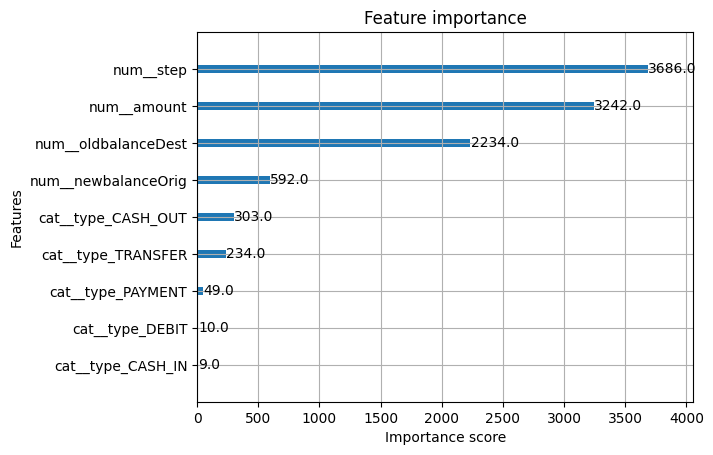

In [93]:
from xgboost import plot_importance

plot_importance(m1)
plt.show()

In [ ]:
import shap

explainer = shap.TreeExplainer(m1)
shap_values = explainer.shap_values(X_res)
shap.summary_plot(shap_values, X_res, plot_type='bar')

# Not all features are good predictors. We can remove the ones that do not affect the model.


# For data updates, focus on collecting inputs for the important features carefully.
# Removing unnecessary features reduces memory usage and makes further work easier.